In [6]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, GlobalAveragePooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
train_dir = "../dataset/train" #passing the path with training images
test_dir = "../dataset/test"   #passing the path with testing images

In [3]:
img_size = 48 #original size of the image

In [4]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model= tf.keras.models.Sequential()

# Bloc 1: 32 filtres
model.add(Conv2D(32, (3, 3), padding='same', use_bias=False, input_shape=(48, 48, 1), name='conv1'))
model.add(BatchNormalization(name='bn1'))
model.add(Activation('relu', name='relu1'))
model.add(MaxPool2D(pool_size=(2, 2), name='pool1'))
model.add(Dropout(0.25, name='drop1'))

# Bloc 2: 64 filtres
model.add(Conv2D(64, (3, 3), padding='same', use_bias=False, name='conv2'))
model.add(BatchNormalization(name='bn2'))
model.add(Activation('relu', name='relu2'))
model.add(MaxPool2D(pool_size=(2, 2), name='pool2'))
model.add(Dropout(0.25, name='drop2'))

# Bloc 3: 128 filtres (noyau 5x5 comme dans ton code)
model.add(Conv2D(128, (5, 5), padding='same', use_bias=False, name='conv3'))
model.add(BatchNormalization(name='bn3'))
model.add(Activation('relu', name='relu3'))
model.add(MaxPool2D(pool_size=(2, 2), name='pool3'))
model.add(Dropout(0.25, name='drop3'))

# Bloc 4: 512 filtres (avec L2 comme dans ton code)
model.add(Conv2D(512, (3, 3), padding='same', use_bias=False,kernel_regularizer=regularizers.l2(0.01), name='conv4'))
model.add(BatchNormalization(name='bn4'))
model.add(Activation('relu', name='relu4'))
model.add(MaxPool2D(pool_size=(2, 2), name='pool4'))
model.add(Dropout(0.25, name='drop4'))

model.add(GlobalAveragePooling2D(name='gap'))
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

C:\Users\barua\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
epochs = 5
batch_size = 64

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 48, 48, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 48, 48, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 24, 24, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 12, 12, 128)    │       204,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 12, 12, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 6, 6, 512)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 6, 6, 512)      │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (Activation)              │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop4 (Dropout)                 │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,846,583 (10.86 MB)

 Trainable params: 948,199 (3.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 1,896,400 (7.23 MB)

In [13]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.2198 - loss: 3.8745 - val_accuracy: 0.1816 - val_loss: 3.6643
Epoch 2/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 111s 310ms/step - accuracy: 0.2471 - loss: 3.3719 - val_accuracy: 0.2591 - val_loss: 3.1607
Epoch 3/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 110s 307ms/step - accuracy: 0.2630 - loss: 2.9508 - val_accuracy: 0.2926 - val_loss: 2.7345
Epoch 4/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 115s 320ms/step - accuracy: 0.2850 - loss: 2.6163 - val_accuracy: 0.2647 - val_loss: 2.8596
Epoch 5/5
359/359 ━━━━━━━━━━━━━━━━━━━━ 114s 317ms/step - accuracy: 0.3078 - loss: 2.3517 - val_accuracy: 0.3554 - val_loss: 2.1952


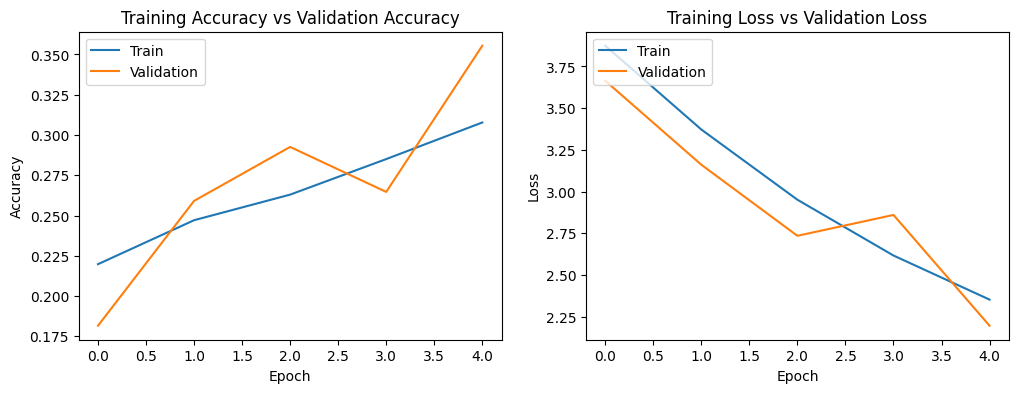

In [14]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
model.save('model_optimal.h5')

/home/cytech/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(48, 48)


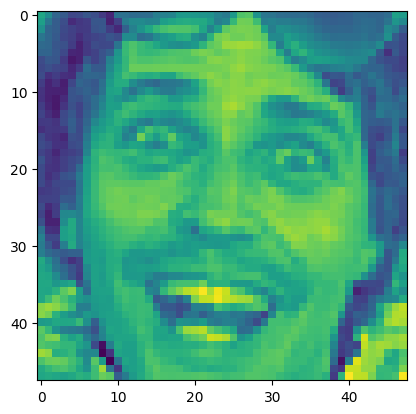

In [13]:
img = image.load_img("../dataset/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [14]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [15]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 189ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [16]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Surprise


In [17]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 4s 170ms/step - loss: 4.9161 - accuracy: 0.3582
final train accuracy = 34.33 , validation accuracy = 35.82


In [18]:
model.save_weights('model_weights.h5')